In [13]:
from math import log

In [14]:
def calcShannonEnt(dataSet):
    numEntries=len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=1
        else:
            labelCounts[currentLabel]+=1
    shannonEnt=0.0
    for key in labelCounts:
        prob=float(labelCounts[key])/numEntries
        shannonEnt-=prob*log(prob,2)
    return shannonEnt

In [15]:
dataSet=[[1,1,'yes'],[1,1,'yes'],[1,0,'no'],[0,1,'no'],[0,1,'no']]
labels=['no surfacing','flippers']

In [16]:
def splitDataSet(dataSet,axis,value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis]==value:#找到value则去掉axis
            reducedFeatVec=featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet

In [17]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures=len(dataSet[0])-1
    baseEntropy=calcShannonEnt(dataSet)
    bestInfoGain=0.0;bestFeature=-1
    for i in range(numFeatures):
        featList=[example[i] for example in dataSet]
        uniqueVals=set(featList)
        newEntropy=0.0
        for value in uniqueVals:
            subDataSet=splitDataSet(dataSet,i,value)
            prob=len(subDataSet)/float(len(dataSet))
            newEntropy+=prob*calcShannonEnt(subDataSet)
        infoGain=baseEntropy-newEntropy
        if infoGain>bestInfoGain:
            bestInfoGain=infoGain
            bestFeature=i
    return bestFeature

In [18]:
import operator

In [19]:
def majorityCnt(classList):
    classCount={}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=1
        else:
            classCount[vote]+=1
    sortedClassCount=sorted(classCount.iteritems(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [22]:
def createTree(dataSet,labels):
    classList=[example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat=chooseBestFeatureToSplit(dataSet)
    bestFeatLabel=labels[bestFeat]
    myTree={bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues=[example[bestFeat] for example in dataSet]
    uniqueVals=set(featValues)
    for value in uniqueVals:
        subLabels=labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [25]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [32]:
decisionNode=dict(boxstyle='sawtooth',fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')

In [33]:
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=myTree.keys()[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else: numLeafs+=1
    return numLeafs

In [34]:
def getTreeDepth(myTree):
    maxDepth=0
    firstStr=myTree.keys()[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else:
            thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth

In [35]:
def plotMidText(cntrPt,parentPt,txtString):
    xMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[0]
    yMid=(parentPt[0]-cntrPt[0])/2.0+cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

In [36]:
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,xycoords='axes fraction',xytext=centerPt, textcoords='axes fraction',
va="center", ha="center", bbox=nodeType, arrowprops=arrow_args)

In [37]:
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=myTree.keys()[0]
    cntrPt=(plotTree.xOff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.yOff=plotTree.yOff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff=plotTree.xOff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff=plotTree.yOff+1.0/plotTree.totalD

In [42]:
def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.xOff=-0.5/plotTree.totalW;plotTree.yOff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

In [43]:
def retrieveTree(i):
    listOfTrees =[{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}},
                  {'no surfacing': {0: 'no', 1: {'flippers': {0: {'head': {0: 'no', 1: 'yes'}}, 1: 'no'}}}}
                  ]
    return listOfTrees[i]

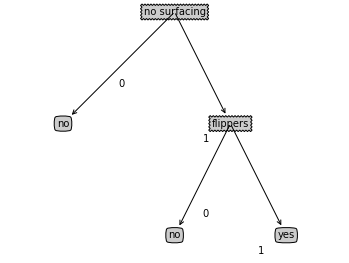

In [44]:
createPlot(retrieveTree(0))

In [46]:
def classify(inputTree,featLabels,testVec):
    firstStr=inputTree.keys()[0]
    secondDict=inputTree[firstStr]
    featIndex=featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__=='dict':
                classLabel=classify(secondDict[key],featLabels,testVec)
            else:
                classLabel=secondDict[key]
    return classLabel

In [50]:
myTree=retrieveTree(0)

In [52]:
myTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [55]:
labels=['no surfacing', 'flippers']

In [56]:
classify(myTree,labels,[1,0])

'no'

In [57]:
def storeTree(inputTree,filename):
    import pickle
    fw=open(filename,'w')
    pickle.dump(inputTree,fw)
    fw.close()

In [58]:
def grabTree(filename):
    import pickle
    fr=open(filename)
    return pickle.load(fr)

In [59]:
fr=open('lenses.txt')

In [60]:
lenses=[inst.strip().split('\t') for inst in fr.readlines()]

In [62]:
lensesLabels=['age','prescript','astigmatic','tearRate']

In [65]:
lensesTree=createTree(lenses,lensesLabels)

In [66]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

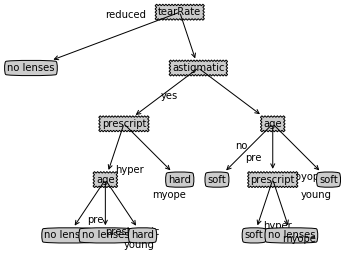

In [67]:
createPlot(lensesTree)